# Policy iteration
### From Reinforced Learning

## Example 4.2: 
Jack’s Car Rental Jack manages two locations for a nationwide car
rental company. Each day, some number of customers arrive at each location to rent cars.
If Jack has a car available, he rents it out and is credited $\$10$ by the national company.
If he is out of cars at that location, then the business is lost. Cars become available for
renting the day after they are returned. To help ensure that cars are available where
they are needed, Jack can move them between the two locations overnight, at a cost of
$\$2$ per car moved. We assume that the number of cars requested and returned at each
location are Poisson random variables, meaning that the probability that the number is
n is: $$\frac{\lambda^n}{n!}e^{-\lambda}$$ where $\lambda$ is the expected number. Suppose $\lambda$
is 3 and 4 for rental requests at the first and second locations and 3 and 2 for returns.
To simplify the problem slightly, we assume that there can be no more than 20 cars at each
location (any additional cars are returned to the nationwide company, and thus disappear 
from the problem) and a maximum of five cars can be moved from one location to the other
in one night. We take the discount rate to be $\gamma$ = 0.9 and formulate this as a continuing
finite MDP, where the time steps are days, the state is the number of cars at each 
location at the end of the day, and the actions are the net numbers of cars moved between
the two locations overnight. Figure 4.2 shows the sequence of policies found by policy 
iteration starting from the policy that never moves any cars.

## Expected Results:
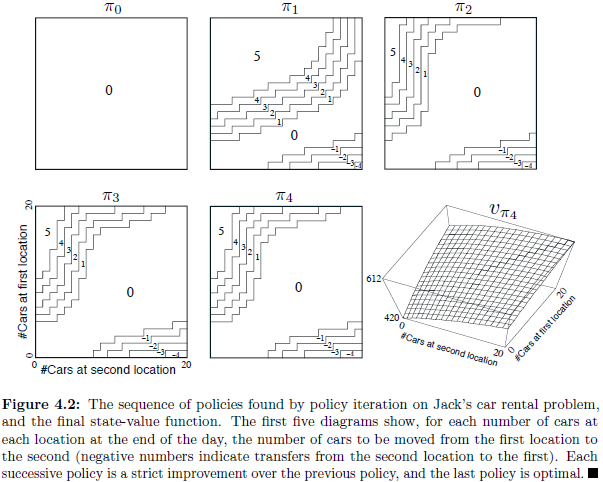

In [76]:
import random
import math
import matplotlib.pyplot as plt

# Recreating Example 4.2

I highly recommend looking at the implementation but not actually doing this because this takes a lot of brainpower.

In [124]:
def possible_actions(cars):
    return [i for i in range(-1 * min(5, cars[0]),  min(5, cars[1]) - 1)]

def in_range(num):
    return max(0, min(20, num))

Begin policy evaluation
delta: 204.24595734972607
delta: 132.9723681168719
delta: 79.97841009997586
delta: 52.5081022367587
delta: 34.1570573268188
delta: 22.084167940807504
delta: 14.384977408002214
delta: 9.52897482823846
Finished policy evaluation.
Finished Policy Improvement, new Policy:


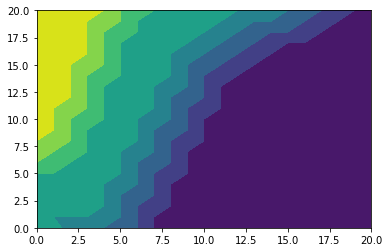

Begin policy evaluation
delta: 245.3634636589215
delta: 13.834446166510759
delta: 8.29278689366555
Finished policy evaluation.
Finished Policy Improvement, new Policy:


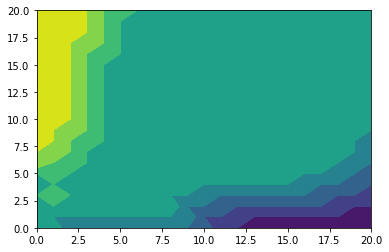

Begin policy evaluation
delta: 27.905028745369123
delta: 10.295474745576826
delta: 5.161123986721066
Finished policy evaluation.
Finished Policy Improvement, new Policy:


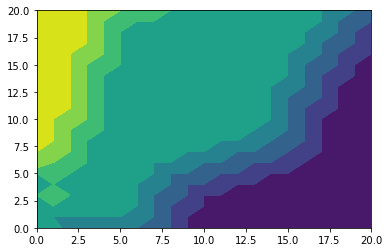

Begin policy evaluation
delta: 34.72152889471647
delta: 4.644219079442564
Finished policy evaluation.
Finished Policy Improvement, new Policy:


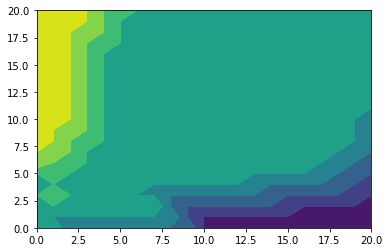

Begin policy evaluation
delta: 22.241754003422898
delta: 8.582578171734951
Finished policy evaluation.
Finished Policy Improvement, new Policy:


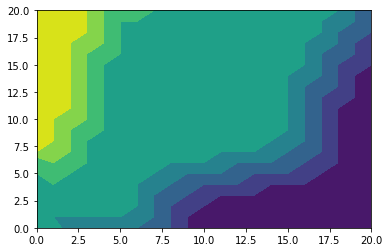

In [150]:
ERROR = 10
GAMMA = 0.9

# Initialization
V = {}
states = []
reqs = {}
rets = {}
policy = {}

for loc1_car in range(21):
    for loc2_car in range(21):
        state = (loc1_car, loc2_car)
        V[state] = 0
        
        #policy[state] = random.choice(possible_actions(state))
        policy[state] = 0

        prob_req = 3**state[0]/math.factorial(state[0])*math.e**(-1 * 3) * 4**state[1]/math.factorial(state[1])*math.e**(-1 * 4)
        prob_ret = 3**state[0]/math.factorial(state[0])*math.e**(-1 * 3) * 2**state[1]/math.factorial(state[1])*math.e**(-1 * 2)

        if prob_req > 1 * (10 ** -6):
            reqs[state] = prob_req
        if prob_ret > 1 * (10 ** -6):
            rets[state] = prob_ret  
        
        states.append(state)

    
'''
Policy Evaluation
'''

for _ in range(5):
    print("Begin policy evaluation")
    while True:
        delta = 0
        for state in states:
            # print(f"testing state {state}")
            v = V[state]
            V[state] = - 2 * abs(policy[state])
            newCar1, newCar2 = (state[0] + policy[state], state[1] - policy[state])
            for pos_req in reqs.keys():
                for pos_ret in rets.keys():
                    newState = in_range(newCar1 + pos_ret[0] - pos_req[0]), in_range(newCar2 + pos_ret[1] - pos_req[1])
                    reward = min(pos_req[0], newCar1) * 10 + min(pos_req[1], newCar2) * 10 
                    V[state] += rets[pos_ret] * reqs[pos_req] * (reward + GAMMA * V[newState]) 
            # print(V[state])
            delta = max(delta, abs(v - V[state]))
        print(f"delta: {delta}")
        if delta < ERROR:
            break
    print("Finished policy evaluation.")

    # Policy Improvement
    policystable = True

    for state in states:
        old = policy[state]
        max_value = 0
        max_arg = 0
        for action in possible_actions(state): 
            # print(f"possible actions: {possible_actions(state)}")
            newCar1, newCar2 = (state[0] + action, state[1] - action)
            value = -2 * abs(action)
            for pos_req in reqs.keys():
                for pos_ret in rets.keys():
                    newState = (in_range(newCar1 + pos_ret[0] - pos_req[0]), in_range(newCar2 + pos_ret[1] -pos_req[1]))
                    reward = min(pos_req[0], newCar1) * 10 + min(pos_req[1], newCar2) * 10 
                    value += rets[pos_ret] * reqs[pos_req] * (reward + GAMMA * V[newState])
                    #print(f"For state {state} and action {action} and pos_req {pos_req} and pos_ret {pos_ret}, value = {value}")
            if value > max_value:
                max_value = value
                max_arg = action
                # print(f"found value to {value} with action {action}")
        policy[state] = max_arg
        # print(f"updated value to {max_value} with action {max_arg}")
        # print(f"For state {state} max action found is {policy[state]}")
        if policy[state] != old:
            policystable = False


    print("Finished Policy Improvement, new Policy:")
    cs = plt.contourf([i for i in range(21)], [i for i in range(21)], [[policy[(x,y)] for x in range(21)] for y in range(21)])
    plt.show()
    
    # exits at either policy stable or after 5 iterations
    if policystable:
        break


Recreated the results approximatly enough. I did run into a case where the policy was alternating between two near optimal states (the last two states seen when running the code above), unsure of this is a common occurence when solving this problem or not but I solved it by having a cap on the number of iterations rather than waiting for a stable policy, this should not affect the results meaningfully as the final solution is accurate enough. Especially since this first section is purely to check the functionality of the logic before moving on to excercise 4.7.

Keep in mind this version's action values are switched. Positive actions is moving the cars from the second to the first, Negative, from first to second. This affects the resulting policy matrix as being transposed (flipped along y=x) from the book's solution.
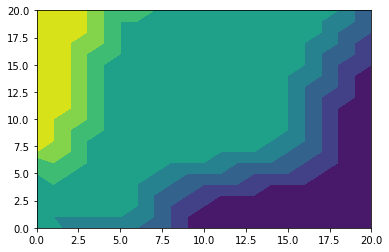

# Excercise 4.7
Write a program for policy iteration and re-solve Jack’s car
rental problem with the following changes. One of Jack’s employees at the first location
rides a bus home each night and lives near the second location. She is happy to shuttle
one car to the second location for free. Each additional car still costs $\$2$, as do all cars
moved in the other direction. In addition, Jack has limited parking space at each location.
If more than 10 cars are kept overnight at a location (after any moving of cars), then an
additional cost of $\$4$ must be incurred to use a second parking lot (independent of how
many cars are kept there). These sorts of nonlinearities and arbitrary dynamics often
occur in real problems and cannot easily be handled by optimization methods other than
dynamic programming.

Reusing the same code we can rewrite it more cleanly to solve 4.7 with relative ease having done example 4.2:

In [151]:
def q_value(state, action, reqs, rets, GAMMA, V):
    
    value = 0
    newCar1, newCar2 = (state[0] + action, state[1] - action)
    
    '''
    New rules that subtract from the value
    '''
    
    if action > 0:
        value -= 2 * action
    if action < 0:
        value -= 2 * abs(action + 1) 
    
    if newCar1 > 10:
        value -= 4
    if newCar2 > 10:
        value -= 4
    
    
    for pos_req in reqs.keys():
        for pos_ret in rets.keys():
            newState = (in_range(newCar1 + pos_ret[0] - pos_req[0]), in_range(newCar2 + pos_ret[1] -pos_req[1]))
            reward = min(pos_req[0], newCar1) * 10 + min(pos_req[1], newCar2) * 10 
            value += rets[pos_ret] * reqs[pos_req] * (reward + GAMMA * V[newState])
    return value

Begin policy evaluation
delta: 172.24915004770173
delta: 119.94219288572033
delta: 80.10564389843066
delta: 55.60272732594416
delta: 38.23821123546247
delta: 26.37767180125934
delta: 18.834994790007897
delta: 14.008092580154766
delta: 11.431985517575669
delta: 9.835328241989458
Finished policy evaluation.
Finished Policy Improvement, new Policy:


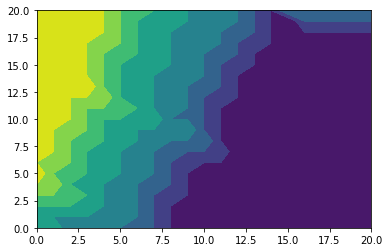

Begin policy evaluation
delta: 151.09566674704328
delta: 17.71080924005338
delta: 10.31095040834299
delta: 8.319840225372161
Finished policy evaluation.
Finished Policy Improvement, new Policy:


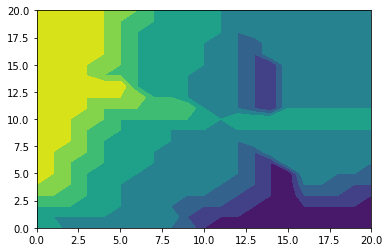

Begin policy evaluation
delta: 15.024806490654498
delta: 8.467933125973161
Finished policy evaluation.
Finished Policy Improvement, new Policy:


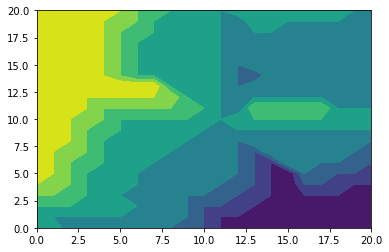

Begin policy evaluation
delta: 5.198826710280912
Finished policy evaluation.
Finished Policy Improvement, new Policy:


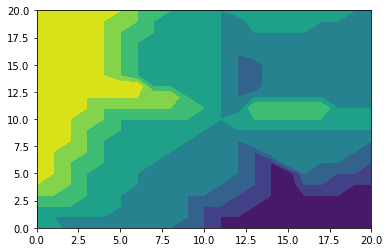

Begin policy evaluation
delta: 4.3016655090065115
Finished policy evaluation.
Finished Policy Improvement, new Policy:


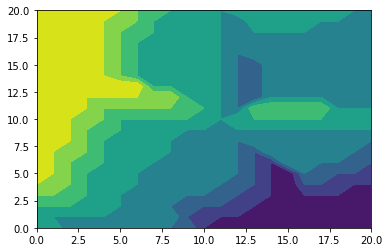

In [149]:
ERROR = 10
GAMMA = 0.9

# Initialization
V = {}
states = []
reqs = {}
rets = {}
policy = {}

for loc1_car in range(21):
    for loc2_car in range(21):
        state = (loc1_car, loc2_car)
        V[state] = 0
        
        policy[state] = 0

        prob_req = 3**state[0]/math.factorial(state[0])*math.e**(-1 * 3) * 4**state[1]/math.factorial(state[1])*math.e**(-1 * 4)
        prob_ret = 3**state[0]/math.factorial(state[0])*math.e**(-1 * 3) * 2**state[1]/math.factorial(state[1])*math.e**(-1 * 2)

        if prob_req > 1 * (10 ** -6):
            reqs[state] = prob_req
        if prob_ret > 1 * (10 ** -6):
            rets[state] = prob_ret  
        
        states.append(state)

for _ in range(5):
    print("Begin policy evaluation")
    while True:
        delta = 0
        for state in states:
            # print(f"testing state {state}")
            v = V[state]
            V[state] = q_value(state, policy[state], reqs, rets, GAMMA, V)
            delta = max(delta, abs(v - V[state]))
        print(f"delta: {delta}")
        if delta < ERROR:
            break
    print("Finished policy evaluation.")

    # Policy Improvement
    policystable = True

    for state in states:
        old = policy[state]
        max_value = 0
        max_arg = 0
        for action in possible_actions(state): 
            value = q_value(state, action, reqs, rets, GAMMA, V)
            if value > max_value:
                max_value = value
                max_arg = action
        policy[state] = max_arg

        if policy[state] != old:
            policystable = False

    print("Finished Policy Improvement, new Policy:")
    cs = plt.contourf([i for i in range(21)], [i for i in range(21)], [[policy[(x,y)] for x in range(21)] for y in range(21)])
    plt.show()

    # exits at either policy stable or after 5 iterations
    if policystable:
        break

# Results for 4.7

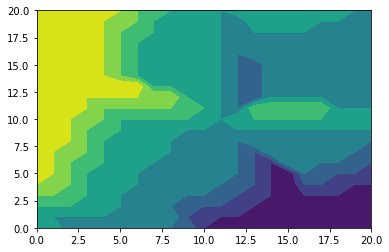

Results resemble the ones from 4.2 but with extra lines above the 10 mark for both location1 and location 2. This is due to the new added costs for storing more than 10 cars in either locations (it would make more sense to move cars away from a location that needs the increased cost parking than to pay the parking fee).